# Lending Club Case Study

## Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.<br><br>

-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Step 1 : Sourcing Data

-  Importing required libraries

In [245]:
# Importing Libraries for data manipulation
import numpy as np
import pandas as pd

# Importing Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Warnings library will be used to ignore some warnings
import warnings
warnings.filterwarnings('ignore')

-  Reading csv file and initializing dataframe

In [246]:
df = pd.read_csv("loan.csv")
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## Step 2 : Data Cleaning

  ### 1. Fixing rows and columns

-  ##### Deleting duplicate rows

In [247]:
print(df.shape)
df.drop_duplicates()
print(df.shape)

(39717, 111)
(39717, 111)


There were no duplicate row hence there are no change in the dataframe's shape

-  ##### Deleting columns which are irrelevent informations.

Deleting (id,member_id,url,title,emp_title) columns as these atrributes are irrelevent.

In [248]:
df.drop(['id','member_id','url','title','emp_title'], axis=1, inplace = True)
df.shape

(39717, 106)

Deleting zip_code column because it has been masked and cannot be used during analysis.

In [249]:
df.drop(['zip_code'], axis=1, inplace = True)
df.shape

(39717, 105)

Deleting below listed columns because these are applicant behaviour atrributes and recorded after the loan approval hence they cannot be used as input for the defaulter analysis.

In [250]:
irrelevent_columns_list = [ 'delinq_2yrs', 
                        'earliest_cr_line',
                        'inq_last_6mths',
                        'open_acc', 
                        'pub_rec', 
                        'revol_bal', 
                        'revol_util', 
                        'total_acc',
                        'out_prncp', 
                        'out_prncp_inv',
                        'total_pymnt',
                        'total_pymnt_inv',
                        'total_rec_prncp',
                        'total_rec_int',
                        'total_rec_late_fee',
                        'recoveries',
                        'collection_recovery_fee',
                        'last_pymnt_d',
                        'last_pymnt_amnt',
                        'last_credit_pull_d']

df.drop(irrelevent_columns_list, axis=1, inplace = True)
df.shape

(39717, 85)

Deleting columns which contains single values only because such columns will not be helpful in the analysis.

In [251]:
df.drop(df.columns[df.nunique() <= 1], axis=1, inplace = True)
df.shape

(39717, 22)

### 2. Fixing Missing Values

-  ##### Deleting rows in which entire row contains NA/Blank only.

In [252]:
print(df.shape)
df.dropna(axis = 0, how = 'all', inplace = True)
print(df.shape)

(39717, 22)
(39717, 22)


There were no rows in which entire row contains NA/Blank hence there are no change in the dataframe's shape

-  ##### Deleting columns in which entire columns contains NA/Blank only.

In [253]:
print(df.shape)
df.dropna(axis = 1, how = 'all', inplace = True)
print(df.shape)

(39717, 22)
(39717, 22)


There were no columns in which entire column contains NA/Blank hence there are no change in the dataframe's shape

-  ##### Deleting columns with high percentage (>= 30%) of null values.

Finding columns name having null values percentage >= 30%

In [254]:
temp_series = (df.isnull().sum()/len(df.index)*100).round(2)
print(temp_series)
temp_column_list = (temp_series[temp_series >= 30].index).tolist()
print(temp_column_list)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
desc                      32.59
purpose                    0.00
addr_state                 0.00
dti                        0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
next_pymnt_d              97.13
pub_rec_bankruptcies       1.75
dtype: float64
['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


Now, we have columns name having percentage of null values greater than or eqaul to 30%. hence removing these columns.
<p>['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']</p>

In [255]:
df.drop(temp_column_list, axis=1, inplace = True)
df.shape

(39717, 18)

-  ##### Treating (delete or impute) missing values using business judgement

Finding remaining missing values

In [256]:
temp_series = (df.isnull().sum()/len(df.index)*100).round(2)
print(temp_series[(temp_series > 0) & (temp_series < 30)])

emp_length              2.71
pub_rec_bankruptcies    1.75
dtype: float64


Checking values in emp_length columns

In [257]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

We have to remove the rows having null values in emp_length column because it cannot be fixed with any business judgement.

In [258]:
print(df.shape)
df.dropna(subset=['emp_length'], inplace = True)
print(df.shape)

(39717, 18)
(38642, 18)


checking values in pub_rec_bankruptcies column

In [259]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

Finding mean and the median value for the pub_rec_bankruptcies column

In [260]:
df.pub_rec_bankruptcies.describe()

count    37945.000000
mean         0.041560
std          0.200507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

As the distribution of values in pub_rec_bankruptcies column is quite narrow, hence filling zero (median value) in place of null values will have no impact on the analysis.

In [261]:
df.pub_rec_bankruptcies.fillna(0,inplace=True)

Checking missing values

In [262]:
temp_series = (df.isnull().sum()/len(df.index)*100).round(2)
print(temp_series)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64


### 3. Standardising Values

-  ##### Removing extra characters like common prefix/suffix, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.

Removing suffix ' months' from the term column and converting it into integer tpye

In [263]:
df['term'] = df['term'].apply(lambda x: x.replace(' months','')).astype(int)
df.term.value_counts()

term
36    28287
60    10355
Name: count, dtype: int64

Removing suffix '%' from the int_rate column and converting it into float type 

In [264]:
df['int_rate'] = df['int_rate'].map(lambda x: x.strip('%')).astype('float')
df.int_rate.value_counts()

int_rate
10.99    932
13.49    813
11.49    800
7.51     756
7.88     701
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

Converting '< 1' year into '0.5' years, '10+' years into '10' and finally removing suffix 'year' and ' years' 

In [265]:
df.emp_length = df.emp_length.apply(lambda x: x.replace('< 1','0.5'))
df.emp_length = df.emp_length.apply(lambda x: x.replace('+',''))
df.emp_length = df.emp_length.apply(lambda x: x.replace('years','').strip())
df.emp_length = df.emp_length.apply(lambda x: x.replace('year','').strip())
df.emp_length.value_counts()

emp_length
10     8879
0.5    4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: count, dtype: int64

### 4. Fixing Invalid Values

-  ##### Correcting data type and format of columns

Coverting issue_d column into datetime format.

In [266]:
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38642 non-null  int64         
 1   funded_amnt           38642 non-null  int64         
 2   funded_amnt_inv       38642 non-null  float64       
 3   term                  38642 non-null  int32         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  object        
 7   sub_grade             38642 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        38642 non-null  object        
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  object        
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

Correcting the data type of the columns

In [267]:
df.emp_length = df.emp_length.astype(float)
df.grade = df.grade.astype('category')
df.sub_grade = df.sub_grade.astype('category')
df.home_ownership = df.home_ownership.astype('category')
df.verification_status = df.verification_status.astype('category')
df.loan_status = df.loan_status.astype('category')
df.purpose = df.purpose.astype('category')
df.addr_state = df.addr_state.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38642 non-null  int64         
 1   funded_amnt           38642 non-null  int64         
 2   funded_amnt_inv       38642 non-null  float64       
 3   term                  38642 non-null  int32         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  category      
 7   sub_grade             38642 non-null  category      
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  category      
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  category      
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

Coverting all float data type column values in the dataframe up to 2 decimal place 

In [268]:
df.round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38642 non-null  int64         
 1   funded_amnt           38642 non-null  int64         
 2   funded_amnt_inv       38642 non-null  float64       
 3   term                  38642 non-null  int32         
 4   int_rate              38642 non-null  float64       
 5   installment           38642 non-null  float64       
 6   grade                 38642 non-null  category      
 7   sub_grade             38642 non-null  category      
 8   emp_length            38642 non-null  float64       
 9   home_ownership        38642 non-null  category      
 10  annual_inc            38642 non-null  float64       
 11  verification_status   38642 non-null  category      
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

### 5. Removing outliers

-  ##### Checking outlier values in continuous columns (loan_amnt, int_rate, annual_inc, dti) via box plot

Using plotly liberary for creating interactive charts

In [269]:
# Creating list for each boxplot title
subplot_titles_list = [
    'DTI Ratio',
    'Loan Amount',
    'Interest Rate',
    'Annual Income'
]

# Create subplots with 1 rows and 4 columns
fig = make_subplots(rows=1, cols=4, subplot_titles=subplot_titles_list)

# Add boxplots to each subplot
fig.add_trace(go.Box(y=df.dti, name='DTI Ratio'), row=1, col=1)
fig.add_trace(go.Box(y=df.loan_amnt, name='Loan Amount'), row=1, col=2)
fig.add_trace(go.Box(y=df.int_rate, name='Interest Rate'), row=1, col=3)
fig.add_trace(go.Box(y=df.annual_inc, name='Annual Income'), row=1, col=4)


# Update layout for better spacing
fig.update_layout(height=500, width=1000, title_text="Distribution of Continuous columns")

# Show the plot
fig.show()

Observations<br>
-  In Debt To Income (DTI) Ratio, There are no outliers hence we can move ahead with analysis.
-  In Loan Amount, Upper fence is 29175 and max is 35000 which is very near to upper fence hence we can move ahead with analysis because it will not have much impact on the analysis.
-  In Interest Rate , Upper fence is 22.64 and max is 24.59 which is also very near to upper fence hence we can move ahead with analysis.
-  In Annual Income,Upper fence is 145.9k and max is 6M which is clearly indincating the presence of outliers.

Checking quantile in annual_inc to take an appropriate action for removing outliers

In [270]:
df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])

0.50      60000.00
0.75      83199.99
0.90     117000.00
0.95     143975.00
0.97     168000.00
0.98     190000.00
0.99     235000.00
1.00    6000000.00
Name: annual_inc, dtype: float64

There is huge increase in the value after 99th percentile (from 235K to 6000K). Thus we can remove values greater than 99th percentile.

In [271]:
df = df[~(df.annual_inc > df.annual_inc.quantile(0.99))]
df.shape

(38257, 18)

### 6. Filtering Data

To infer from the data, we only need loan data whose loan status is either completed or Defaulted. Loan data whose status is current, will not be helpful in the defaulter analysis hence for choosing a relevant parts of the data set for analysis, removing rows in which loan status is current.

In [272]:
print(df.shape)
df = df[(df.loan_status != 'Current')]
print(df.shape)

(38257, 18)
(37173, 18)


Checking categories in loan status

In [273]:
df.loan_status.value_counts()

loan_status
Fully Paid     31813
Charged Off     5360
Current            0
Name: count, dtype: int64

Removing unused catergory from loan status column because it may create unnesscery 

In [274]:
df.loan_status = df.loan_status.cat.remove_unused_categories()
df.loan_status.value_counts()

loan_status
Fully Paid     31813
Charged Off     5360
Name: count, dtype: int64

loan data has been cleaned. Now we move futher and perform analysis on this data.

## Step 3 : Univariate Analysis

### 1. Categorical Variable Analysis

-  ##### Analyzing Home Ownership

Checking categories in home ownerhip in our data set

In [275]:
df.home_ownership.unique()

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']
Categories (5, object): ['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

According to the Data Dictionary, There are only four categories ('RENT', 'OWN', 'MORTGAGE', 'OTHER'). We need to remove the NONE catergory. Let's check the count of NONE catergory.

In [276]:
df.home_ownership.value_counts()

home_ownership
RENT        17999
MORTGAGE    16331
OWN          2744
OTHER          96
NONE            3
Name: count, dtype: int64

There are only 3 records which belongs to NONE category. Let's move them along with OTHER catergory.

In [277]:
df.home_ownership.replace('NONE','OTHER',inplace=True)
df.home_ownership.value_counts()

home_ownership
RENT        17999
MORTGAGE    16331
OWN          2744
OTHER          99
Name: count, dtype: int64

Now, analyzing Home Ownership

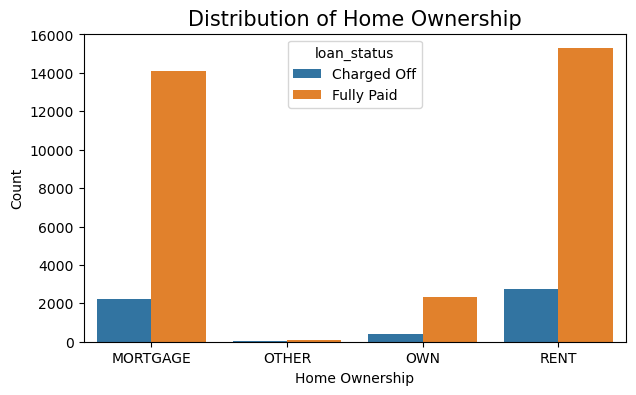

In [278]:
plt.figure(figsize=(7,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=15)
plt.show()

<b>Observations : </b> Majority of borrowsers don't posses property and they are on either mortage or rent.

-  ##### Analyzing Verification Status

Checking categories in Verification Status in our data set

In [279]:
df.verification_status.unique()

['Verified', 'Source Verified', 'Not Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']

Now, analyzing Verification Status.

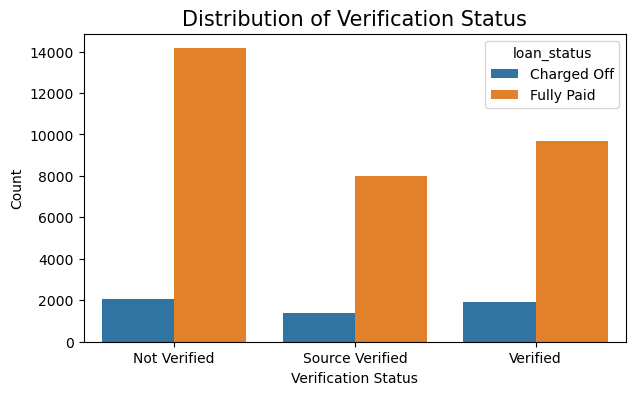

In [280]:
plt.figure(figsize=(7,4))
sns.countplot(x='verification_status',data=df,hue='loan_status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=15)
plt.show()

<b>Observations : </b> Majority of borrower's Verification Status is Not Verified.

-  ##### Analyzing Loan Status

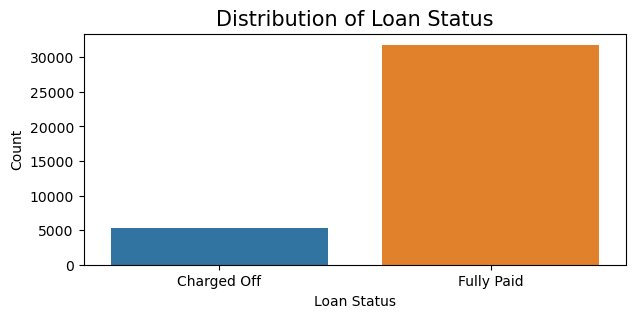

In [281]:
plt.figure(figsize=(7,3))
sns.countplot(x='loan_status',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status',fontsize=15)
plt.show()

<b>Observations : </b> There are very less Charged Off loans as compare to Fully Paid.

-  ##### Analyzing Purpose

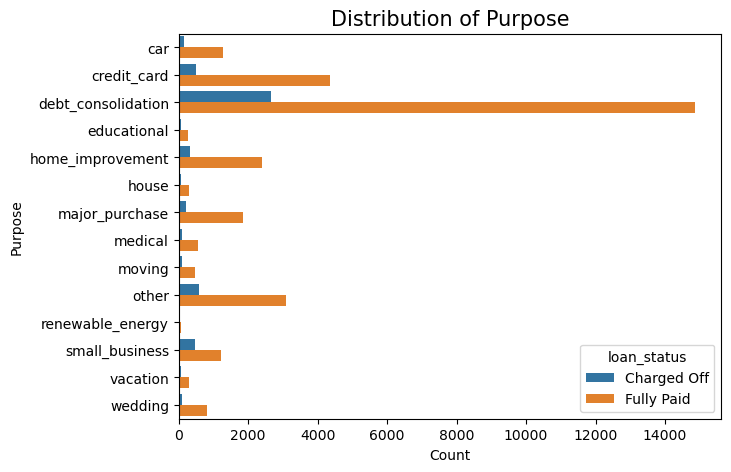

In [282]:
plt.figure(figsize=(7,5))
sns.countplot(y='purpose',data=df,hue='loan_status')
plt.ylabel('Purpose')
plt.xlabel('Count')
plt.title('Distribution of Purpose',fontsize=15)
plt.show()

<b>Observations : </b>A large number of loans are taken to pay for debt consolidation and credit card by the borrowers.

-  ##### Analyzing State

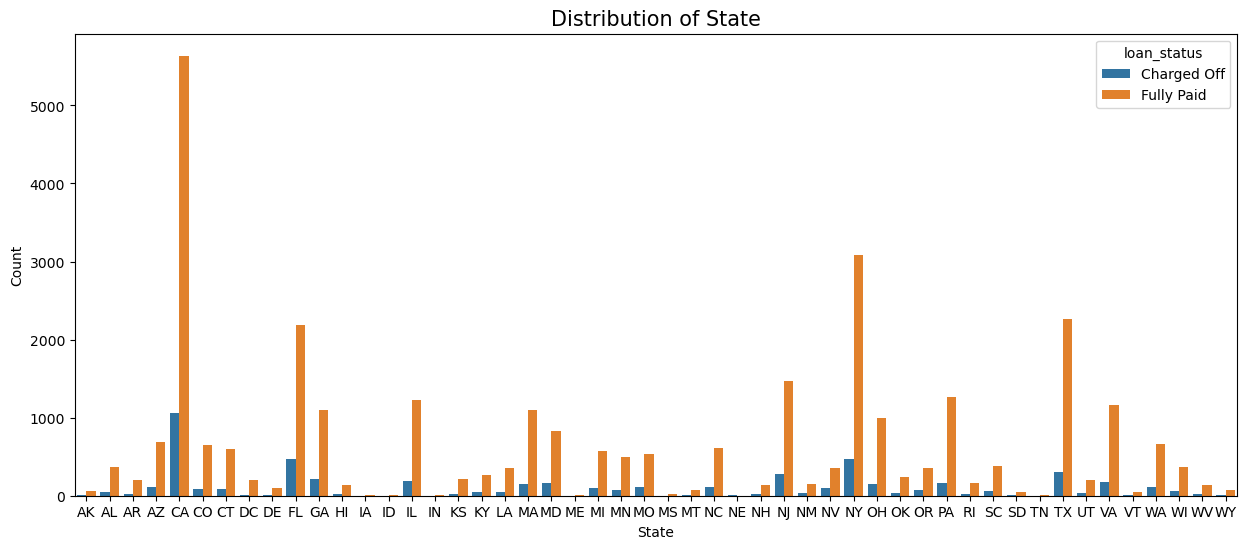

In [283]:
plt.figure(figsize=(15,6))
sns.countplot(x='addr_state',data=df,hue='loan_status')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of State',fontsize=15)
plt.show()

<b>Observations : </b>Large number of borrowers are from california, florida, New York and Texas cities.

-  ##### Analyzing Grade

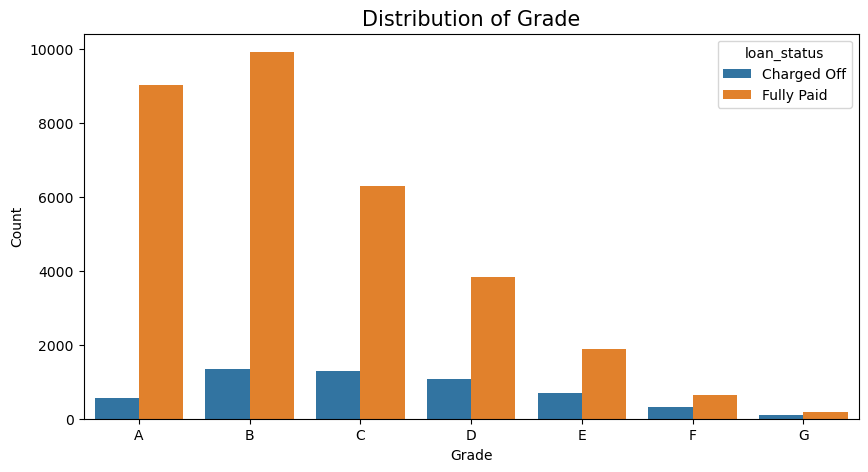

In [284]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade',data=df,hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grade',fontsize=15)
plt.show()

<b>Observations : </b>Large number of borrowers are from grade A and grade B.

-  ##### Analyzing Sub Grade

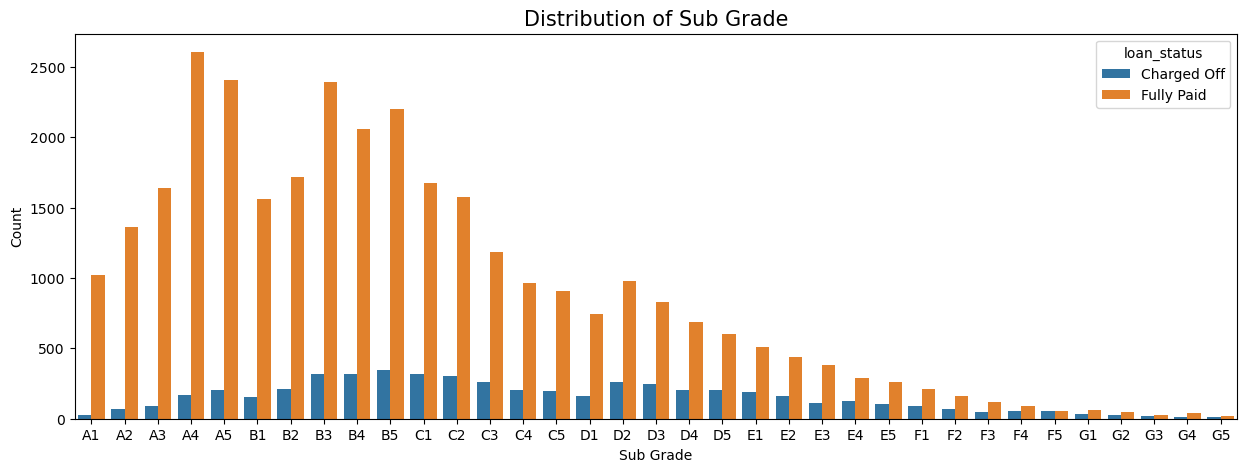

In [285]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=df,hue='loan_status')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub Grade',fontsize=15)
plt.show()

<b>Observations : </b>Large number of borrowers are from A4, A5, B3, & B5. In Distribution of Grade also, Grade A and B has large number of borrowers.

-  ##### Analyzing Term

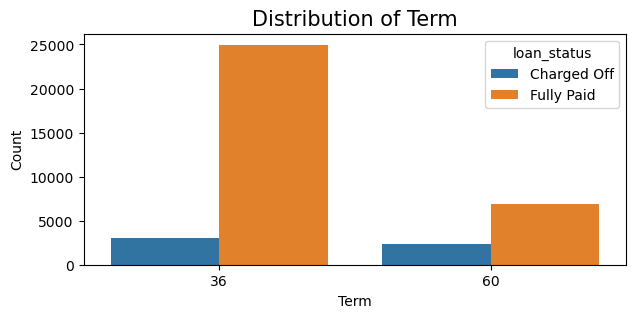

In [286]:
plt.figure(figsize=(7,3))
sns.countplot(x='term',data=df,hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term',fontsize=15)
plt.show()

<b>Observations : </b>Most of the borrower are taking loan having 36 months term.

-  ##### Analyzing Employment Length

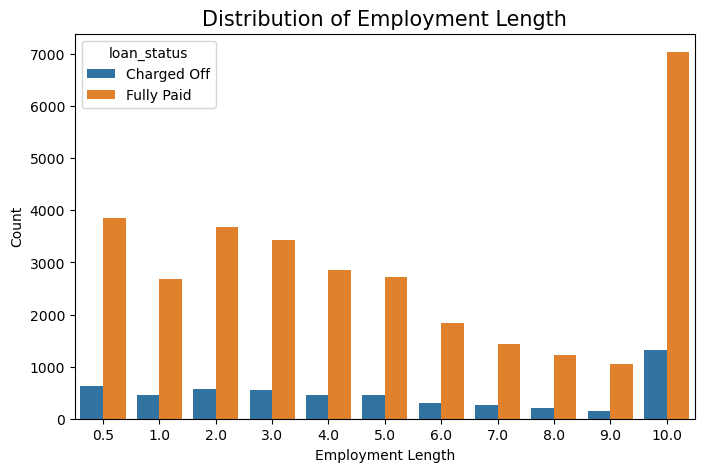

In [287]:
plt.figure(figsize=(8,5))
sns.countplot(x='emp_length',data=df,hue='loan_status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=15)
plt.show()

<b>Observations : </b>Most of the borrowers have more than 10 years of employment length.

### 2. Quantitative Variable Analysis

-  ##### Analyzing Loan Amount

In [288]:
print(df.loan_amnt.describe())
fig = px.box(df, y="loan_amnt")
fig.update_layout(height=600, width=800, title_text="Distribution of Loan Amount")
fig.update_yaxes(title_text='Loan Amount')
fig.show()

count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<b>Observations : </b> Most of the loan amount taken are in range of 5400 and 15000.

-  ##### Analyzing Amount variables - Loan Amount,  Funded Amount and Funded Amount

In [289]:
# Creating list for each boxplot title
subplot_titles_list = [
    'Loan Amount',
    'Funded Amount',
    'Funded Amount Investor'
]

# Create subplots with 1 rows and 4 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=subplot_titles_list)

# Add boxplots to each subplot
fig.add_trace(go.Box(y=df.loan_amnt, name='Loan Amount'), row=1, col=1)
fig.add_trace(go.Box(y=df.funded_amnt, name='Funded Amount'), row=1, col=2)
fig.add_trace(go.Box(y=df.funded_amnt_inv, name='Funded Amount Investor'), row=1, col=3)


# Update layout for better spacing
fig.update_layout(height=500, width=1000, title_text="Amounts Distribution Plot")

# Show the plot
fig.show()

<b>Observations : </b><br>
-  Loan Amount, Funded Amount and Funded Amount almost have same distribution.

-  ##### Analyzing Interest Rate

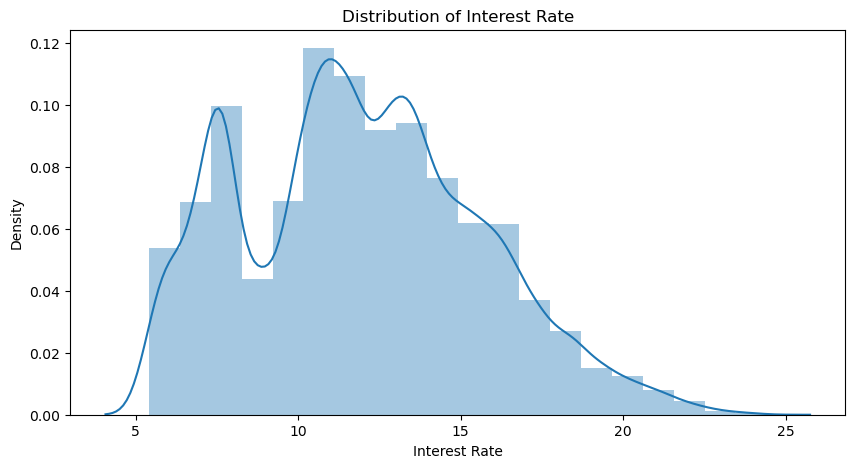

In [290]:
plt.figure(figsize=(10,5))
sns.distplot(sorted(df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

<b>Observations : </b> The interest rate is more crowded between 10-15 which means most of the loans having interest rate in range from 10 to 15.

-  ##### Analyzing Annual Income

count     37173.000000
mean      65939.461555
std       35236.990734
min        4000.000000
25%       40944.000000
50%       59000.000000
75%       81708.000000
max      235000.000000
Name: annual_inc, dtype: float64


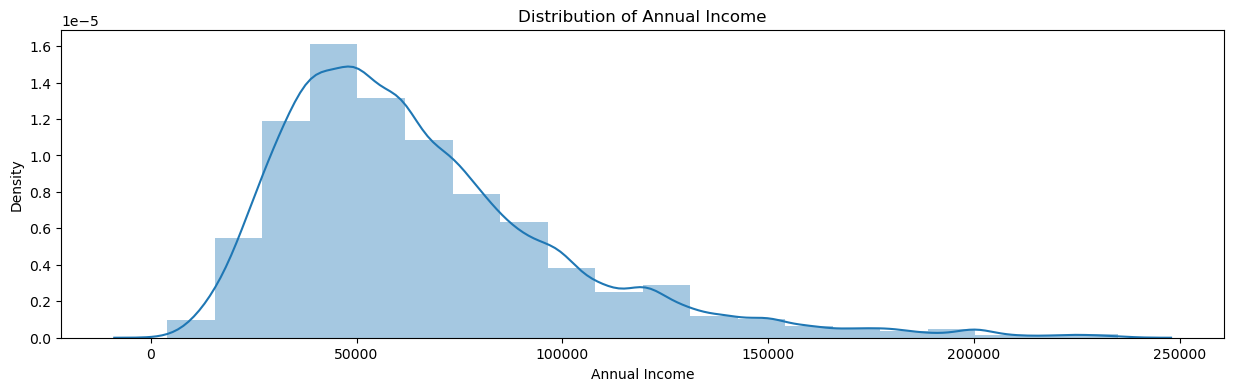

In [291]:
print(df.annual_inc.describe())
plt.figure(figsize=(15,4))
sns.distplot(df.annual_inc,kde=True,bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

<b>Observations : </b><br>
-  Annual Income is mostly concentrated around 50000 which means many borrowers is having low annual income.
-  Most of the borrower's Annual incomes are in range of 40944- 81708.

- ### Analyzing Debt To Income (DTI) Ratio

count    37173.000000
mean        13.344551
std          6.644839
min          0.000000
25%          8.240000
50%         13.450000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


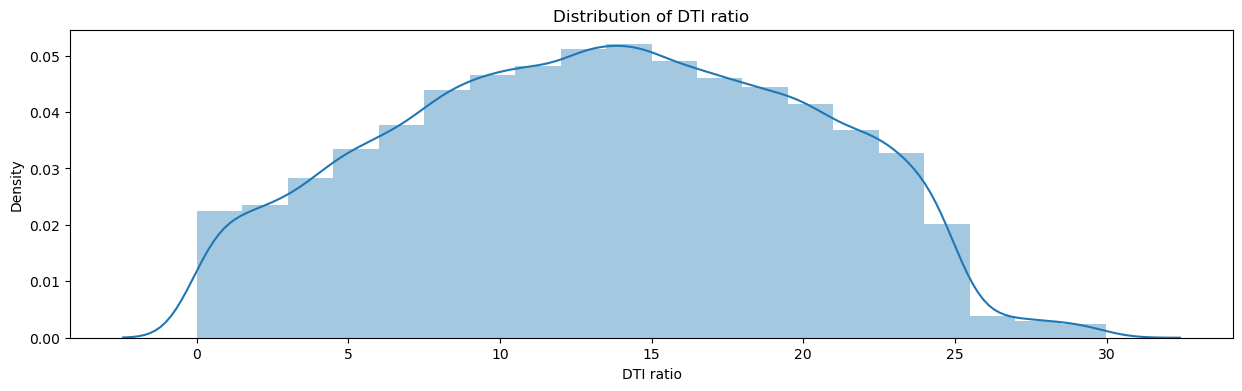

In [292]:
print(df.dti.describe())
plt.figure(figsize=(15,4))
sns.distplot(df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio')
plt.show()

<b>Observations : </b> DTI ratio is mostly concentrated between 10 and 15 which means that most of the borrowers has DTI ratio between 10 to 15.

- ### Analyzing Public Recorded Bankruptcy

pub_rec_bankruptcies
0.0    35642
1.0     1526
2.0        5
Name: count, dtype: int64


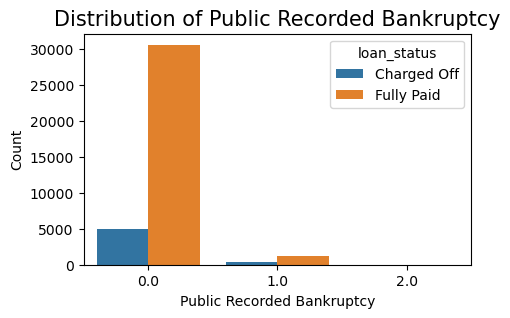

In [293]:
print(df.pub_rec_bankruptcies.value_counts())
plt.figure(figsize=(5,3))
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')
plt.xlabel('Public Recorded Bankruptcy')
plt.ylabel('Count')
plt.title('Distribution of Public Recorded Bankruptcy',fontsize=15)
plt.show()

<b>Observations : </b> Mostly borrowers has no record of public bankruptcy.

- ### Analyzing Installments

count    37173.000000
mean       322.116786
std        206.213376
min         15.690000
25%        166.940000
50%        278.590000
75%        424.800000
max       1305.190000
Name: installment, dtype: float64


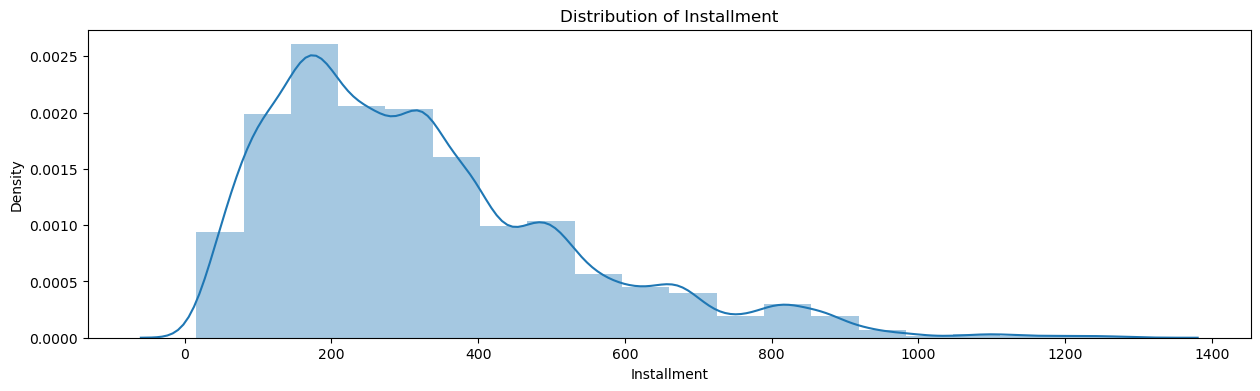

In [294]:
print(df.installment.describe())
plt.figure(figsize=(15,4))
sns.distplot(df.installment,kde=True,bins=20)
plt.xlabel('Installment')
plt.ylabel('Density')
plt.title('Distribution of Installment')
plt.show()

<b>Observations : </b> Installment is mostly concentrated between 100 to 400 which means that borrowers are paying loan with installment between 100 and 400.

## Step 4 : Bivariate Analysis

-  ### Bivariate analysis on continuous variable

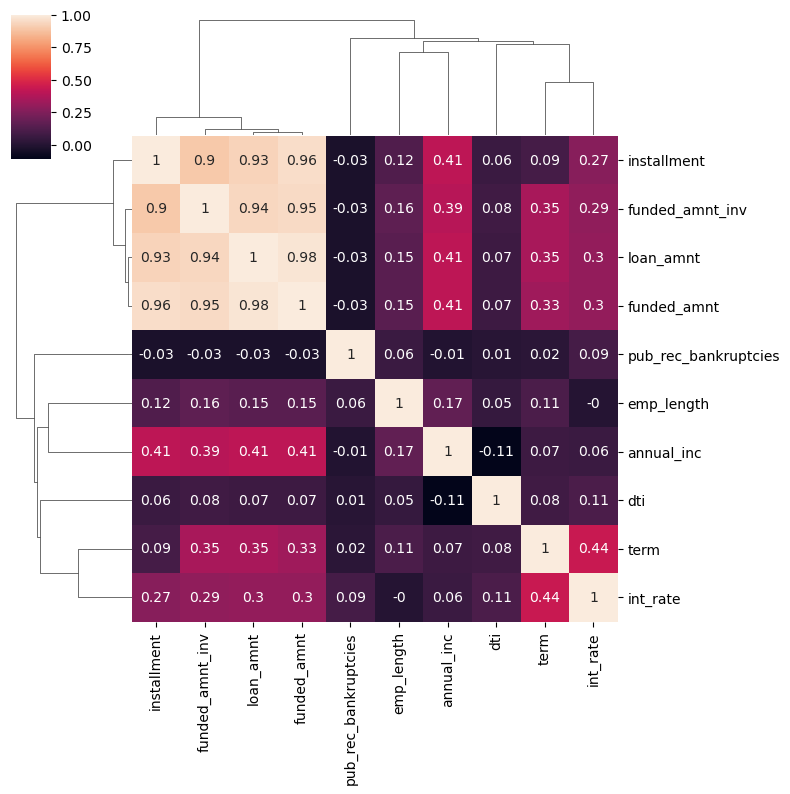

In [295]:
continuous_loan_df = df.select_dtypes(include='number').corr().round(2)
sns.clustermap(continuous_loan_df,annot=True,figsize=(8, 8))
plt.show()

<b>Observations</b><br>
-  Loan Amount, Funded Amount Investor, Funded Amount are strongly correlated which means that if Loan Amount increases then Funded Amount Investor and Funded Amount will also increase.
-  Annual Income and DTI (Debt To Income) ratio is highly negatively correalted which means that if Annual Income increases then DTI ratio will decrease.
-  Interest Rate and Loan Payment Term have positive correlation which means high Loan Payment Term will have high Interest Rate.
-  Annual Income and Employment length also have possitive correlation which means If borrower have high Employment Length then he/she must have high Annual Income.


-  ### Bivariate analysis on categorical variables

Driving columns which will help in analysis further in bivariate analysis.

In [296]:
# categorise annual incomes into buckets
df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets
df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets.
df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

print(df.shape)

(37173, 21)


- ###### Analyzing Annual income against Loan Status

loan_status      Charged Off  Fully Paid  Total  Chargedoff_Proportion
annual_inc_cats                                                       
0-20000                  191         818   1009                   0.19
20000-40000             1421        6709   8130                   0.17
40000-60000             1675        9326  11001                   0.15
60000-80000             1002        6503   7505                   0.13
80000 +                 1071        8457   9528                   0.11

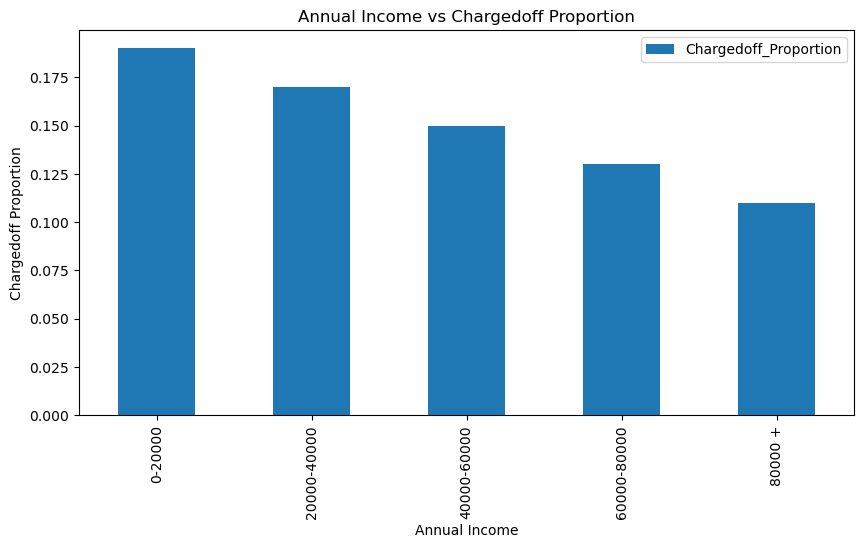

In [297]:
bi_income_vs_status = pd.crosstab(df['annual_inc_cats'], df['loan_status'])
bi_income_vs_status['Total'] = bi_income_vs_status['Charged Off'] + bi_income_vs_status['Fully Paid']
bi_income_vs_status['Chargedoff_Proportion'] = (bi_income_vs_status['Charged Off'] / bi_income_vs_status['Total']).round(2)
bi_income_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(10, 5),title='Annual Income vs Chargedoff Proportion',xlabel='Annual Income',ylabel='Chargedoff Proportion')
bi_income_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations</b><br>
-  Income range 80000+  has less chances of charged off.
-  Income range 0-20000 has high chances of charged off.
-  Notice that with increase in annual income charged off proportion got decreased. 

- ###### Analyzing Interest Rate against Loan Status

loan_status    Charged Off  Fully Paid  Total  Chargedoff_Proportion
int_rate_cats                                                       
16 +                  1216        3251   4467                   0.27
12.5-16               1924        9208  11132                   0.17
10-13                 1177        7919   9096                   0.13
0-10                   758       10988  11746                   0.06

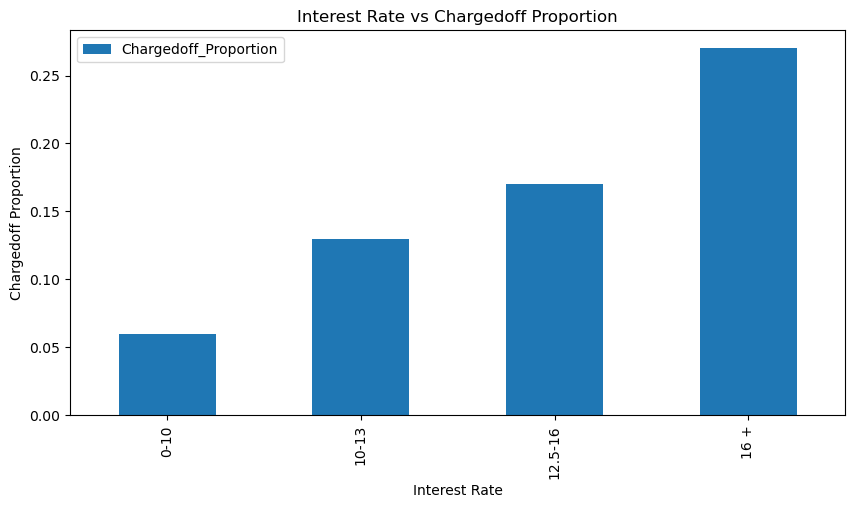

In [298]:
bi_purpose_vs_status = pd.crosstab(df['int_rate_cats'], df['loan_status'])
bi_purpose_vs_status['Total'] = bi_purpose_vs_status['Charged Off'] + bi_purpose_vs_status['Fully Paid']
bi_purpose_vs_status['Chargedoff_Proportion'] = (bi_purpose_vs_status['Charged Off'] / bi_purpose_vs_status['Total']).round(2)
bi_purpose_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(10, 5),title='Interest Rate vs Chargedoff Proportion',xlabel='Interest Rate',ylabel='Chargedoff Proportion')
bi_purpose_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations</b><br>
-  Interest rate less than 10% has very less chances of charged off.
-  Interest rate more than 16% has good chances of charged off.
-  Notice that with increase in interest rate charged off proportion got increase. 

- ###### Analyzing DTI Ratio against Loan Status

loan_status  Charged Off  Fully Paid  Total  Chargedoff_Proportion
dti_cats                                                          
25+                 1064        5330   6394                   0.17
15-20               1336        7239   8575                   0.16
10-15               1338        7993   9331                   0.14
05-10                958        6572   7530                   0.13
0-5                  559        4023   4582                   0.12

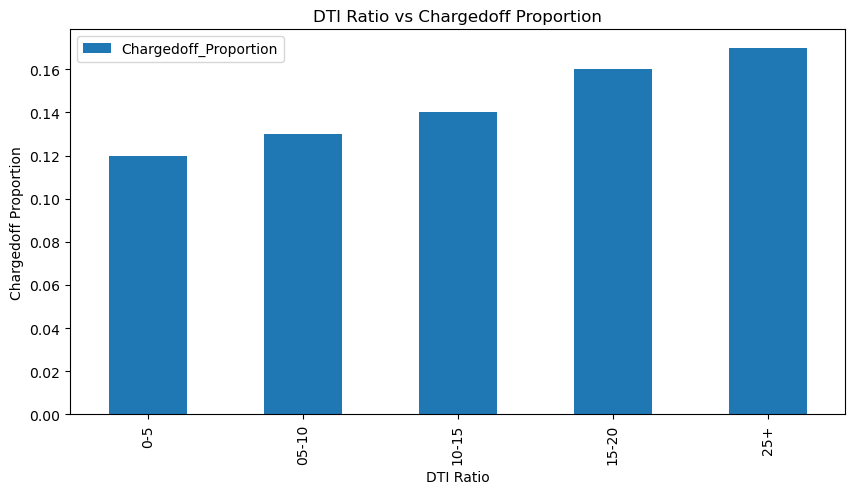

In [299]:
bi_dti_vs_status = pd.crosstab(df['dti_cats'], df['loan_status'])
bi_dti_vs_status['Total'] = bi_dti_vs_status['Charged Off'] + bi_dti_vs_status['Fully Paid']
bi_dti_vs_status['Chargedoff_Proportion'] = (bi_dti_vs_status['Charged Off'] / bi_dti_vs_status['Total']).round(2)
bi_dti_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(10, 5),title='DTI Ratio vs Chargedoff Proportion',xlabel='DTI Ratio',ylabel='Chargedoff Proportion')
bi_dti_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations</b><br>
-  DTI ratio less than 5 has very less chances of charged off.
-  DTI ratio more than 25 has good chances of charged off.
-  Notice that with increase in DTI ratio charged off proportion got increase.

- ###### Analyzing Grade against Loan Status

loan_status  Charged Off  Fully Paid  Total  Chargedoff_Proportion
grade                                                             
G                     98         190    288                   0.34
F                    307         631    938                   0.33
E                    690        1879   2569                   0.27
D                   1080        3844   4924                   0.22
C                   1283        6310   7593                   0.17
B                   1345        9923  11268                   0.12
A                    557        9036   9593                   0.06

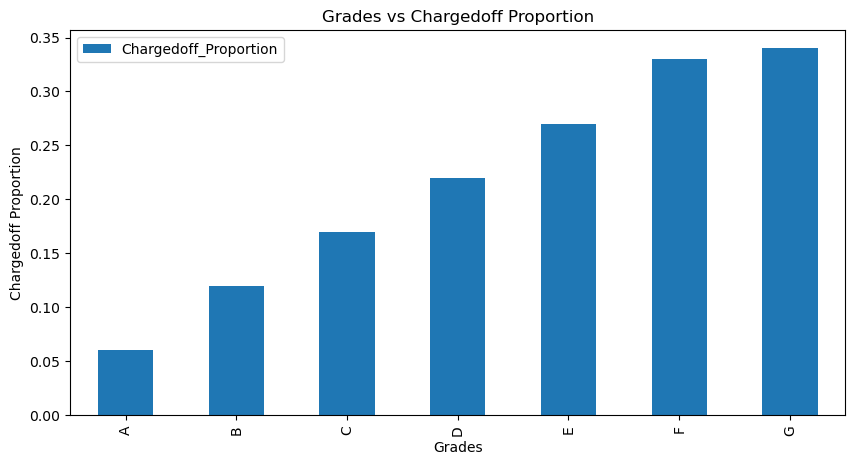

In [300]:
bi_grade_vs_status = pd.crosstab(df['grade'], df['loan_status'])
bi_grade_vs_status['Total'] = bi_grade_vs_status['Charged Off'] + bi_grade_vs_status['Fully Paid']
bi_grade_vs_status['Chargedoff_Proportion'] = (bi_grade_vs_status['Charged Off'] / bi_grade_vs_status['Total']).round(2)
bi_grade_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(10, 5),title='Grades vs Chargedoff Proportion',xlabel='Grades',ylabel='Chargedoff Proportion')
bi_grade_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations</b><br>
-  Grade "A" has very less chances of charged off.
-  Grade "F" and "G" have very high chances of charged off.
-  Notice that Chances of charged off is increasing with grade moving from "A" towards "G".

- ###### Analyzing Sub Grade against Loan Status

loan_status  Charged Off  Fully Paid  Total  Chargedoff_Proportion
sub_grade                                                         
F5                    52          53    105                   0.50
G3                    19          25     44                   0.43
G5                    10          18     28                   0.36
G2                    27          47     74                   0.36
F4                    52          93    145                   0.36
G1                    30          61     91                   0.33
F2                    67         159    226                   0.30
E4                   124         290    414                   0.30
F3                    49         117    166                   0.30
F1                    87         209    296                   0.29
E5                   103         261    364                   0.28
E2                   160         437    597                   0.27
E1                   190         511    701                   0.27
D5                   204         601    805                   0.25
G4                    12          39     51                   0.24
D4                   207         688    895                   0.23
E3                   113         380    493                   0.23
D3                   246         831   1077                   0.23
D2                   260         979   1239                   0.21
D1                   163         745    908                   0.18
C5                   199         910   1109                   0.18
C3                   258        1181   1439                   0.18
C4                   202         967   1169                   0.17
C2                   307        1576   1883                   0.16
C1                   317        1676   1993                   0.16
B5                   346        2198   2544                   0.14
B4                   317        2059   2376                   0.13
B3                   321        2394   2715                   0.12
B2                   208        1714   1922                   0.11
B1                   153        1558   1711                   0.09
A5                   207        2406   2613                   0.08
A4                   168        2605   2773                   0.06
A3                    90        1640   1730                   0.05
A2                    68        1364   1432                   0.05
A1                    24        1021   1045                   0.02

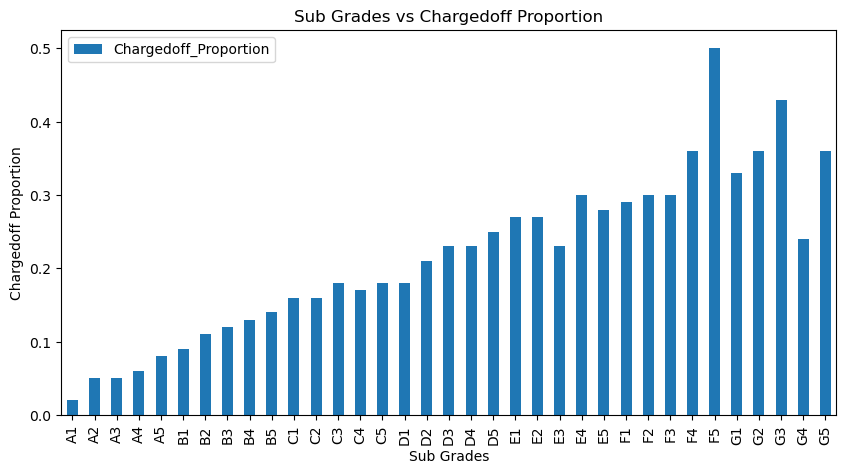

In [301]:
bi_sub_grade_vs_status = pd.crosstab(df['sub_grade'], df['loan_status'])
bi_sub_grade_vs_status['Total'] = bi_sub_grade_vs_status['Charged Off'] + bi_sub_grade_vs_status['Fully Paid']
bi_sub_grade_vs_status['Chargedoff_Proportion'] = (bi_sub_grade_vs_status['Charged Off'] / bi_sub_grade_vs_status['Total']).round(2)
bi_sub_grade_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(10, 5),title='Sub Grades vs Chargedoff Proportion',xlabel='Sub Grades',ylabel='Chargedoff Proportion')
bi_sub_grade_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations</b><br>
-  sub Grades of "A" has very less chances of charged off.
-  sub Grades of "F" and "G" have very high chances of charged off.
-  proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

- ###### Analyzing Employment Length against Loan Status

loan_status  Charged Off  Fully Paid  Total  Chargedoff_Proportion
emp_length                                                        
10.0                1316        7038   8354                   0.16
7.0                  262        1435   1697                   0.15
0.5                  635        3844   4479                   0.14
1.0                  455        2690   3145                   0.14
3.0                  551        3427   3978                   0.14
4.0                  458        2860   3318                   0.14
5.0                  456        2714   3170                   0.14
6.0                  305        1846   2151                   0.14
8.0                  203        1216   1419                   0.14
2.0                  562        3685   4247                   0.13
9.0                  157        1058   1215                   0.13

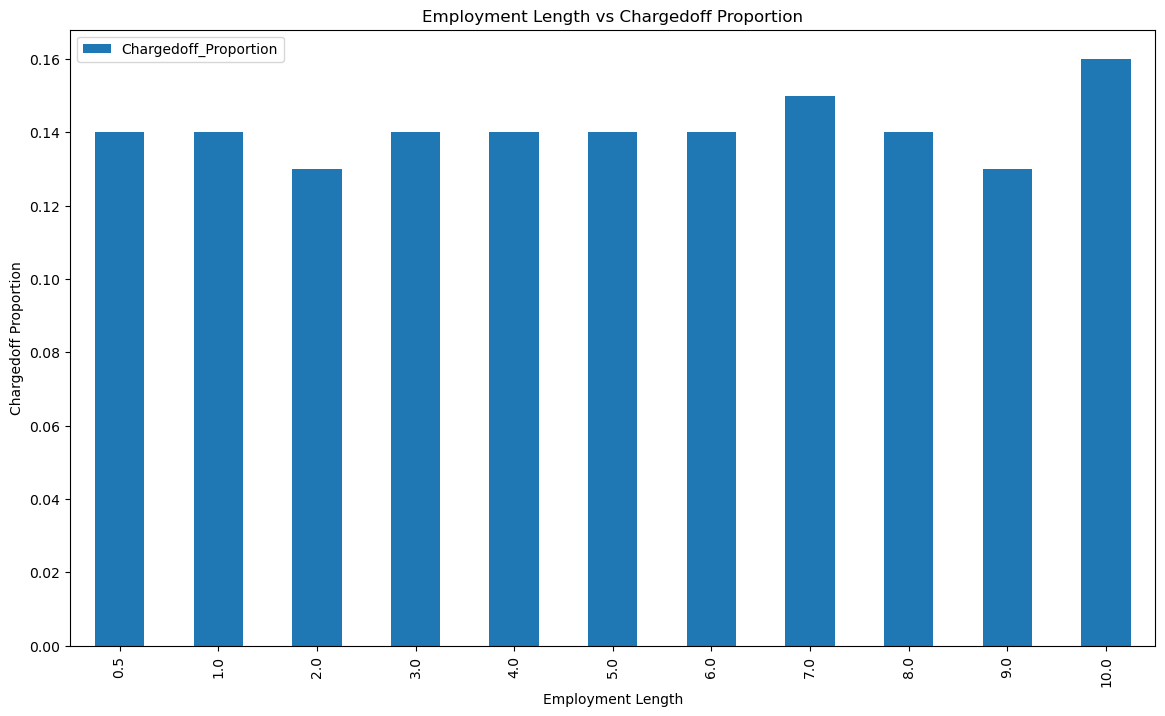

In [302]:
bi_emp_vs_status = pd.crosstab(df['emp_length'], df['loan_status'])
bi_emp_vs_status['Total'] = bi_emp_vs_status['Charged Off'] + bi_emp_vs_status['Fully Paid']
bi_emp_vs_status['Chargedoff_Proportion'] = (bi_emp_vs_status['Charged Off'] / bi_emp_vs_status['Total']).round(2)
bi_emp_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(14, 8),title='Employment Length vs Chargedoff Proportion',xlabel='Employment Length',ylabel='Chargedoff Proportion')
bi_emp_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations - </b> Applicant have more or less same chances of getting charged off.

- ###### Analyzing Purpose against Loan Status

loan_status         Charged Off  Fully Paid  Total  Chargedoff_Proportion
purpose                                                                  
small_business              459        1222   1681                   0.27
renewable_energy             18          74     92                   0.20
house                        58         287    345                   0.17
educational                  52         264    316                   0.16
medical                     101         548    649                   0.16
other                       592        3089   3681                   0.16
debt_consolidation         2665       14875  17540                   0.15
moving                       83         463    546                   0.15
vacation                     50         298    348                   0.14
home_improvement            321        2386   2707                   0.12
car                         155        1286   1441                   0.11
credit_card                 506        4356   4862                   0.10
major_purchase              209        1851   2060                   0.10
wedding                      91         814    905                   0.10

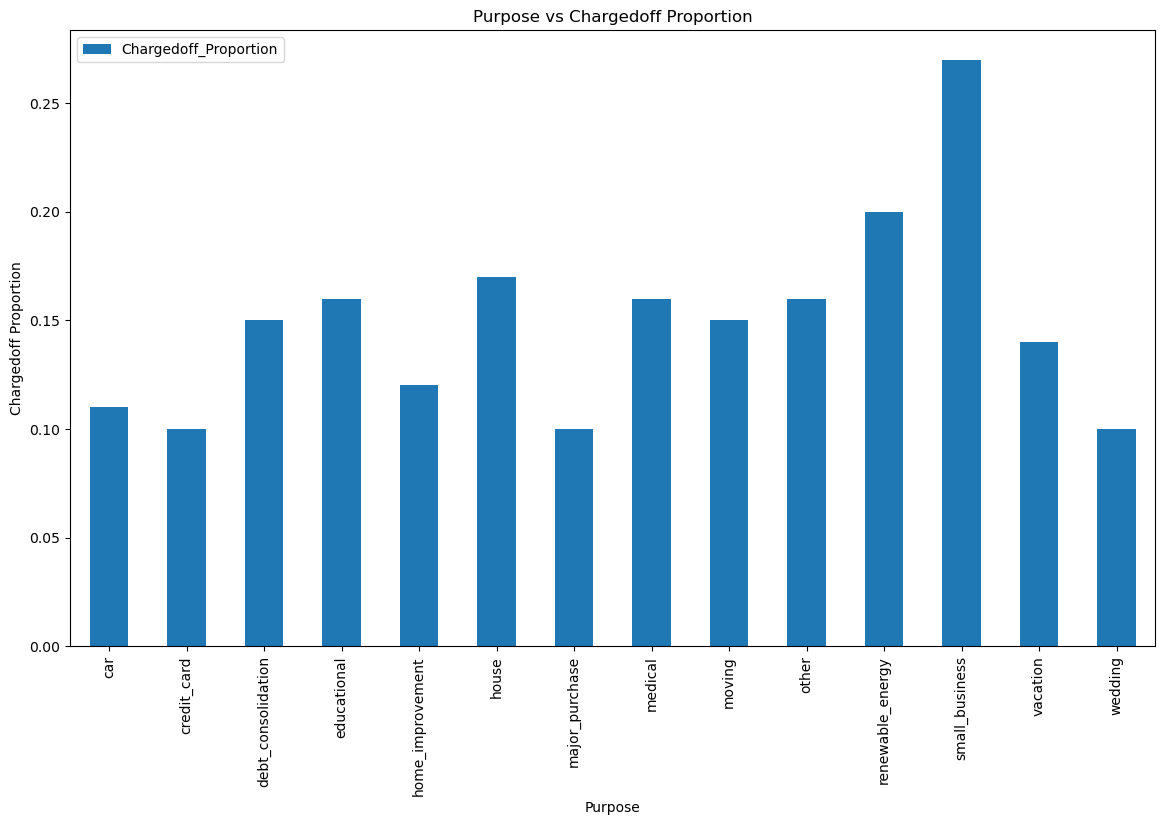

In [303]:
bi_purpose_vs_status = pd.crosstab(df['purpose'], df['loan_status'])
bi_purpose_vs_status['Total'] = bi_purpose_vs_status['Charged Off'] + bi_purpose_vs_status['Fully Paid']
bi_purpose_vs_status['Chargedoff_Proportion'] = (bi_purpose_vs_status['Charged Off'] / bi_purpose_vs_status['Total']).round(2)
bi_purpose_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(14, 8),title='Purpose vs Chargedoff Proportion',xlabel='Purpose',ylabel='Chargedoff Proportion')
bi_purpose_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations - </b> Loan taken for the purpose of small business has high chance of defaulter.

- ###### Analyzing Verification Status against Loan Status

loan_status          Charged Off  Fully Paid  Total  Chargedoff_Proportion
verification_status                                                       
Verified                    1936        9666  11602                   0.17
Source Verified             1385        7994   9379                   0.15
Not Verified                2039       14153  16192                   0.13

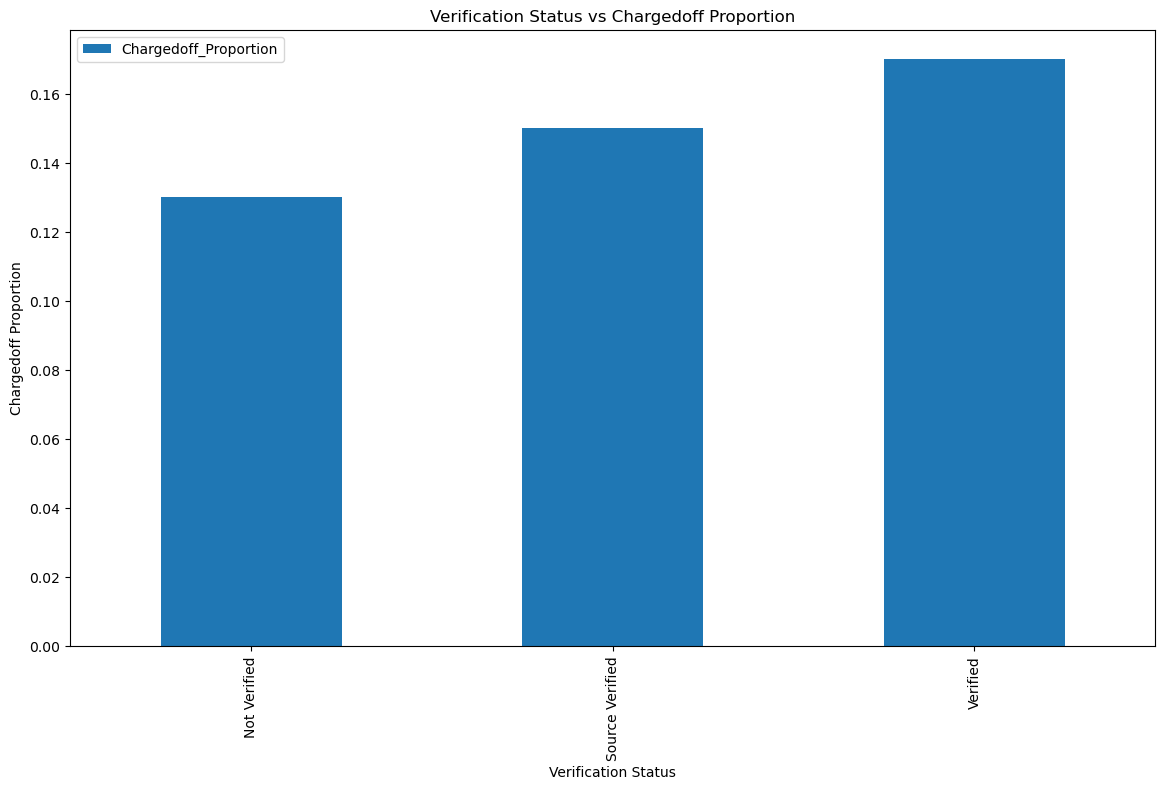

In [304]:
bi_verification_vs_status = pd.crosstab(df['verification_status'], df['loan_status'])
bi_verification_vs_status['Total'] = bi_verification_vs_status['Charged Off'] + bi_verification_vs_status['Fully Paid']
bi_verification_vs_status['Chargedoff_Proportion'] = (bi_verification_vs_status['Charged Off'] / bi_verification_vs_status['Total']).round(2)
bi_verification_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(14, 8),title='Verification Status vs Chargedoff Proportion',xlabel='Verification Status',ylabel='Chargedoff Proportion')
bi_verification_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

There is not much difference to conclude anything from charged off proportion.

- ###### Analyzing Public Recorded Bankruptcy against Loan Status

loan_status           Charged Off  Fully Paid  Total  Chargedoff_Proportion
pub_rec_bankruptcies                                                       
2.0                             2           3      5                   0.40
1.0                           334        1192   1526                   0.22
0.0                          5024       30618  35642                   0.14

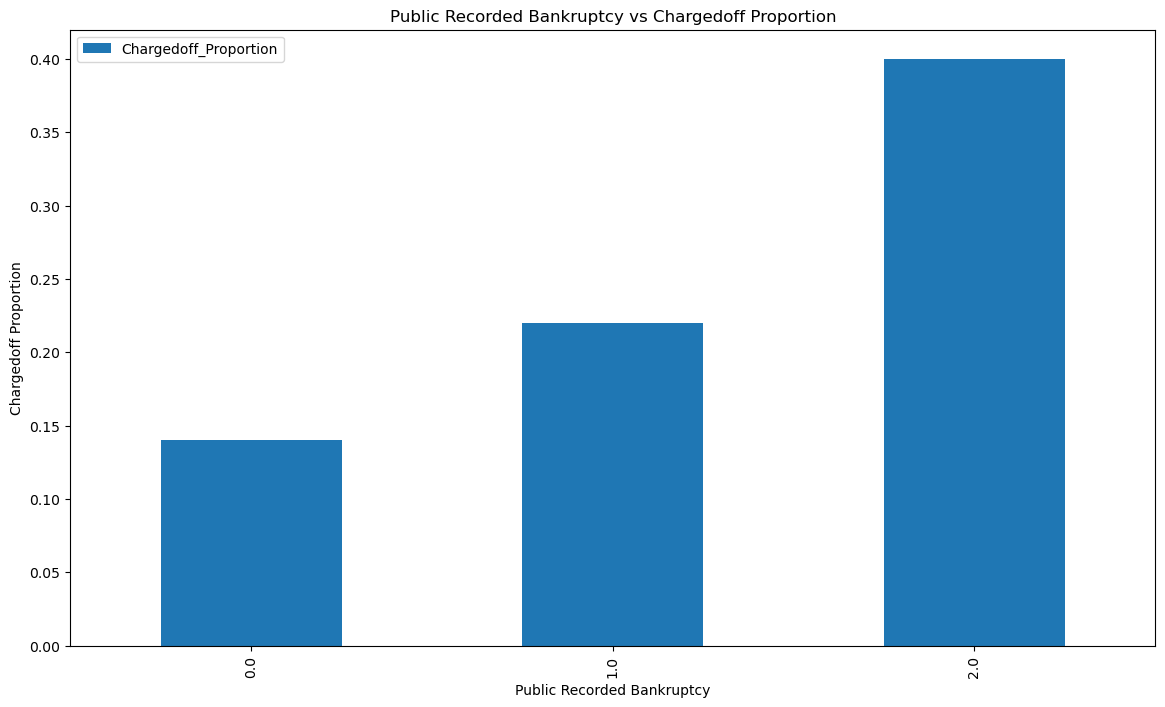

In [305]:
bi_bankrupt_vs_status = pd.crosstab(df['pub_rec_bankruptcies'], df['loan_status'])
bi_bankrupt_vs_status['Total'] = bi_bankrupt_vs_status['Charged Off'] + bi_bankrupt_vs_status['Fully Paid']
bi_bankrupt_vs_status['Chargedoff_Proportion'] = (bi_bankrupt_vs_status['Charged Off'] / bi_bankrupt_vs_status['Total']).round(2)
bi_bankrupt_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(14, 8),title='Public Recorded Bankruptcy vs Chargedoff Proportion',xlabel='Public Recorded Bankruptcy',ylabel='Chargedoff Proportion')
bi_bankrupt_vs_status.sort_values('Chargedoff_Proportion', ascending=False)

<b>Observations</b><br>
-  Public Recorded Bankruptcy count 2 has high charged off proportion which means applicant who has defaulted before has more chances of dafaulting in future.
-  Public Recorded Bankruptcy count 0 has less charged off proportion which means applicant having no Public Recorded Bankruptcy has less chances of dafaulting.

- ###### Analyzing Address State against Loan Status

loan_status  Charged Off  Fully Paid  Total  Chargedoff_Proportion
addr_state                                                        
CA                  1066        5637   6703                   0.16
NY                   472        3079   3551                   0.13
FL                   475        2187   2662                   0.18
TX                   306        2270   2576                   0.12
NJ                   275        1470   1745                   0.16
PA                   168        1260   1428                   0.12
IL                   193        1231   1424                   0.14
VA                   172        1158   1330                   0.13
GA                   209        1102   1311                   0.16
MA                   147        1103   1250                   0.12
OH                   144         997   1141                   0.13
MD                   157         835    992                   0.16
AZ                   112         684    796                   0.14
WA                   118         658    776                   0.15
CO                    90         644    734                   0.12
NC                   110         609    719                   0.15
CT                    89         604    693                   0.13
MI                    96         569    665                   0.14
MO                   106         536    642                   0.17
MN                    79         502    581                   0.14
NV                   100         360    460                   0.22
SC                    64         383    447                   0.14
WI                    59         366    425                   0.14
OR                    69         352    421                   0.16
AL                    51         364    415                   0.12
LA                    52         358    410                   0.13
KY                    45         262    307                   0.15
OK                    40         241    281                   0.14
UT                    39         207    246                   0.16
KS                    26         218    244                   0.11
AR                    26         201    227                   0.11
DC                    15         196    211                   0.07
RI                    25         163    188                   0.13
NM                    29         146    175                   0.17
WV                    21         143    164                   0.13
HI                    28         134    162                   0.17
NH                    23         132    155                   0.15
DE                    12          98    110                   0.11
MT                    10          67     77                   0.13
WY                     3          73     76                   0.04
AK                    14          61     75                   0.19
SD                    11          50     61                   0.18
VT                     6          47     53                   0.11
MS                     2          17     19                   0.11
TN                     2          15     17                   0.12
IN                     0           9      9                   0.00
ID                     1           5      6                   0.17
NE                     3           2      5                   0.60
IA                     0           5      5                   0.00
ME                     0           3      3                   0.00

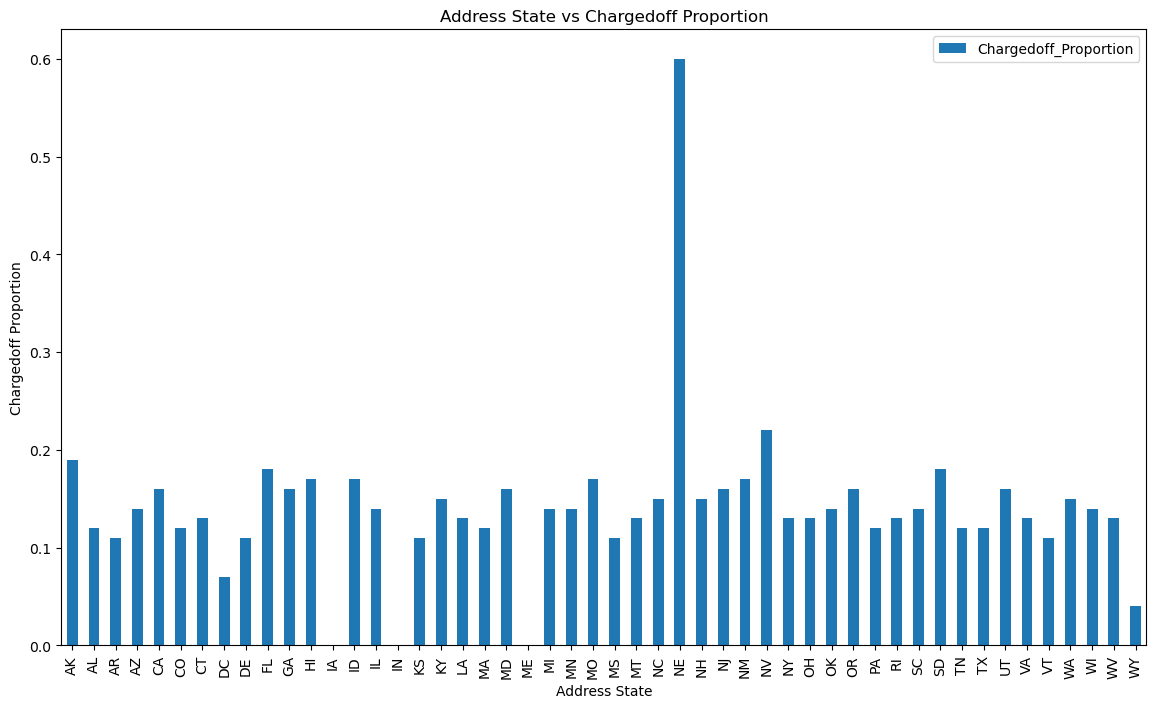

In [306]:
bi_address_vs_status = pd.crosstab(df['addr_state'], df['loan_status'])
bi_address_vs_status['Total'] = bi_address_vs_status['Charged Off'] + bi_address_vs_status['Fully Paid']
bi_address_vs_status['Chargedoff_Proportion'] = (bi_address_vs_status['Charged Off'] / bi_address_vs_status['Total']).round(2)
bi_address_vs_status.plot.bar(y='Chargedoff_Proportion',figsize=(14, 8),title='Address State vs Chargedoff Proportion',xlabel='Address State',ylabel='Chargedoff Proportion')
bi_address_vs_status.sort_values('Total', ascending=False)

<b>Observations</b><br>
-  NE state has high chance of charged off. ME, IN & IA also has zero chance of charged off but we can not make any decisions based on this because number of applications are also in these state.
 - CA, NY, FL & TX has good number of applications and charged offs.

## Step 5 : Insights

###  Univariate Analysis<br>
-  Majority of borrowsers don't posses property and they are on either mortage or rent.
-  Majority of borrower's Verification Status is Not Verified.
-  There are very less Charged Off loans as compare to Fully Paid.
-  A large number of loans are taken to pay for debt consolidation and credit card by the borrowers.
-  Large number of borrowers are from california, florida, New York and Texas cities.
-  Large number of borrowers are from grade A and grade B.
-  Large number of borrowers are from A4, A5, B3, & B5. In Distribution of Grade also, Grade A and B has large number of borrowers.
-  Most of the borrower are taking loan having 36 months term.
-  Most of the borrowers have more than 10 years of employment length.
-  Most of the loan amount taken are in range of 5400 and 15000.
-  Loan Amount, Funded Amount and Funded Amount almost have same distribution.
-  The interest rate is more crowded between 10-15 which means most of the loans having interest rate in range from 10 to 15.
-  Annual Income is mostly concentrated around 50000 which means many borrowers is having low annual income.
-  Most of the borrower's Annual incomes are in range of 40944- 81708.
-  DTI ratio is mostly concentrated between 10 and 15 which means that most of the borrowers has DTI ratio between 10 to 15.
-  Mostly borrowers has no record of public bankruptcy.
-  Installment is mostly concentrated between 100 to 400 which means that borrowers are paying loan with installment between 100 and 400.

###  Bivariate Analysis<br>
-  Loan Amount, Funded Amount Investor, Funded Amount are strongly correlated which means that if Loan Amount increases then Funded Amount Investor and Funded Amount will also increase.
-  Annual Income and DTI (Debt To Income) ratio is highly negatively correalted which means that if Annual Income increases then DTI ratio will decrease.
-  Interest Rate and Loan Payment Term have positive correlation which means high Loan Payment Term will have high Interest Rate.
-  Annual Income and Employment length also have possitive correlation which means If borrower have high Employment Length then he/she must have high Annual Income.
-  With increase in annual income charged off proportion got decreased.
-  With increase in interest rate charged off proportion got increase.
-  With increase in DTI ratio charged off proportion got increase.
-  Loan taken for the purpose of small business has high chance of defaulter.
-  Applicant who has defaulted before has more chances of dafaulting in future.
-  Loan taken for the purpose of small business has high chance of defaulter.
-  Applicant who has Public Recorded Bankruptcy (defaulted before) has more chances of dafaulting in future.

## Step 6 :  Recommendations

-  Below are the driving factor which can be used to predict the chance of defaulting:
    -  Annual Income 
    -  Grade
    -  DTI
    -  Public Recorded Bankruptcy

-  Other considerations for loan defaulter :
	-  Applicants having Annual Income range 0-20000 has high chances of charged off.
	-  Applicants having Interest rate more than 16% has good chnaces of charged off.
	-  Applicants having DTI ratio more than 25 has good chnaces of charged off.
	-  Applicants having Grade "F" and "G" have very high chances of charged off.
    -  Applicants having Public Recorded Bankruptcy.
    -  Applicants having loan purpose as small business.